In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/time-series-19-covid-combined.csv")

In [ ]:
data = data.sort_values("Date").reset_index()

In [ ]:
## Data Cleaning
## Converting Date From string to Datetime

data['Date'] = pd.to_datetime(data['Date'])
print(data)
## replacing Null Values  0 for Numeric Columns
data.isna().sum()
data["Recovered"] = data["Recovered"].fillna(0)
data.isna().sum()

       index       Date         Country/Region  ... Confirmed  Recovered  Deaths
0          0 2020-01-22            Afghanistan  ...         0        0.0       0
1       3900 2020-01-22              Australia  ...         0        0.0       0
2      84175 2020-01-22         United Kingdom  ...         0        0.0       0
3      81250 2020-01-22   United Arab Emirates  ...         0        0.0       0
4       6825 2020-01-22               Barbados  ...         0        0.0       0
...      ...        ...                    ...  ...       ...        ...     ...
88070  68574 2020-12-11                Romania  ...    545567   443168.0   13116
88071  19499 2020-12-11                  China  ...       952      939.0       9
88072  71174 2020-12-11  Sao Tome and Principe  ...      1009      947.0      17
88073  74749 2020-12-11           South Africa  ...    845083   758373.0   22952
88074  88074 2020-12-11               Zimbabwe  ...     11162     9324.0     306

[88075 rows x 7 columns]


index                 0
Date                  0
Country/Region        0
Province/State    61100
Confirmed             0
Recovered             0
Deaths                0
dtype: int64

### 3. **Merge the data for countries with multiple regions in order to provide a single time-series for each country.**

In [ ]:
df_1 = data.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,0,0,0.0
1,2020-01-22,Albania,0,0,0.0
2,2020-01-22,Algeria,0,0,0.0
3,2020-01-22,Andorra,0,0,0.0
4,2020-01-22,Angola,0,0,0.0
...,...,...,...,...,...
62070,2020-12-11,Vietnam,1391,35,1238.0
62071,2020-12-11,West Bank and Gaza,106622,931,81166.0
62072,2020-12-11,Yemen,2082,606,1383.0
62073,2020-12-11,Zambia,18161,365,17329.0


## **4. Print the total number of confirmed cases and number of deaths in each country in the last reported day. What are the 10 countries with the highest number of confirmed COVID-19 cases? What are the 10 countries with the highest number of deaths?**

## **Top 10 Countries with Highest Confirmed Cases**

In [ ]:
new_df = df_1[df_1.Date == "2020-12-11"]
df_2_1 = new_df.sort_values("Confirmed", ascending = False)[:20]
print(df_2_1[["Country/Region","Confirmed"]].head(10)) # 10 Countries with Highest Confirmed Cases


       Country/Region  Confirmed
62061              US   15842789
61963           India    9826775
61907          Brazil    6836227
62025          Russia    2574319
61946          France    2405210
62065  United Kingdom    1814395
61969           Italy    1805873
62060          Turkey    1780673
62045           Spain    1730575
61890       Argentina    1489328


## **Top 10 Countries with highest Deaths**

In [ ]:
df_2_2 = new_df.sort_values("Deaths", ascending = False)
df_ans = df_2_2[["Country/Region","Deaths"]][:10]
df_ans

,Country/Region,Deaths
62061,US,295450
61907,Brazil,180437
61963,India,142628
61998,Mexico,113019
62065,United Kingdom,63603
61969,Italy,63387
61946,France,57671
61965,Iran,51727
62045,Spain,47624
62025,Russia,45370


## **5. Plot a graph of the number of confirmed cases over time for each country. Which countries present exponential growth in the number of cases and which countries are already leaving exponential growth?**
Assumptions :
We will be using the Top 6 Countries[USA, INDIA, Brazil, Russia, France, UK] with Highest Confirmed Cases and observing there exponential Growth by plotting the graph of Total Confirmed Cases vs Month. We will also be Neglecting the December trend and the data for December month is not sufficient to observe the Trend

In [ ]:
import matplotlib.pyplot as plt
country_li = []
df_new = pd.DataFrame(df_2_1["Country/Region"][:6])
df_new_reset = df_new.reset_index()
country_li = df_new_reset["Country/Region"].unique()
country_li

array(['US', 'India', 'Brazil', 'Russia', 'France', 'United Kingdom'],
      dtype=object)

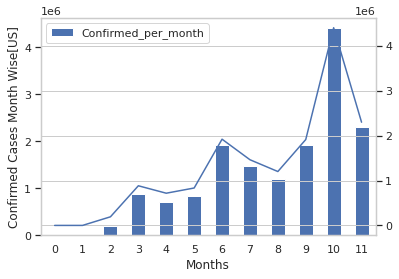

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="US"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[US]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)


## We can clearly observe that US Follows the Exponential Growth Trend

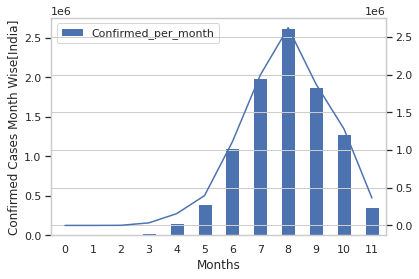

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="India"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[India]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)


## We can clearly observe that India is coming out of the the Exponential Growth Trend

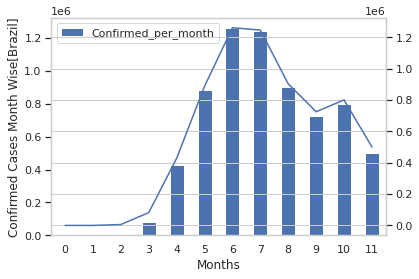

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="Brazil"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[Brazil]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)

## We can clearly observe that Brazil is coming out of the the Exponential Growth Trend

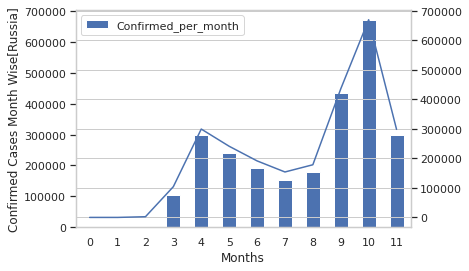

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="Russia"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[Russia]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)

## We can clearly observe that Russia is in the Exponential Growth Trend

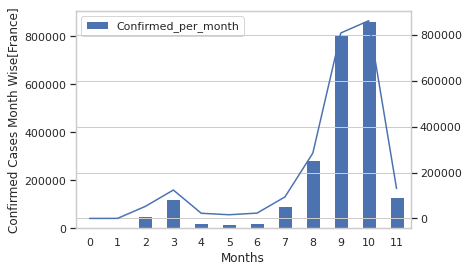

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="France"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[France]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)

## We can clearly observe that France is in the Exponential Growth Trend

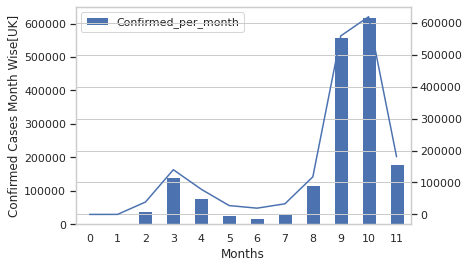

In [ ]:
df_5 = df_1[df_1["Country/Region"]=="United Kingdom"][["Date","Country/Region","Confirmed"]]
x = df_5.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_5["Confirmed_per_month"] = new_li

df_5.Date = pd.to_datetime(df_5.Date)
df_5_new = df_5.groupby(pd.Grouper(key='Date', freq='1M')).agg({"Confirmed_per_month":'sum'}) # groupby each 1 month
df_5_new = df_5_new.reset_index()
df_5_new["Month"] = pd.to_datetime(df_5_new['Date']).dt.to_period('M')
df_5_new[['Month','Confirmed_per_month']].plot(kind='bar',xlabel = "Months" ,ylabel = "Confirmed Cases Month Wise[UK]")
df_5_new['Confirmed_per_month'].plot(secondary_y=True)

## We can clearly observe that Uk is in the Exponential Growth Trend

##  6. Create a bar plot that shows the number of deaths per 100 confirmed cases (observed case-fatality ratio) for the 20 most aected countries. 

In [ ]:
df_2_1["Case_Fatality_Ratio"] = (df_2_1["Deaths"]/(df_2_1["Confirmed"]/100))
df_6 = df_2_1[["Country/Region", "Case_Fatality_Ratio"]].sort_values("Case_Fatality_Ratio",ascending = False)[:20]

Text(0.5, 1.0, ' Case Fatality Ratio per 100 Confirmed Cases')

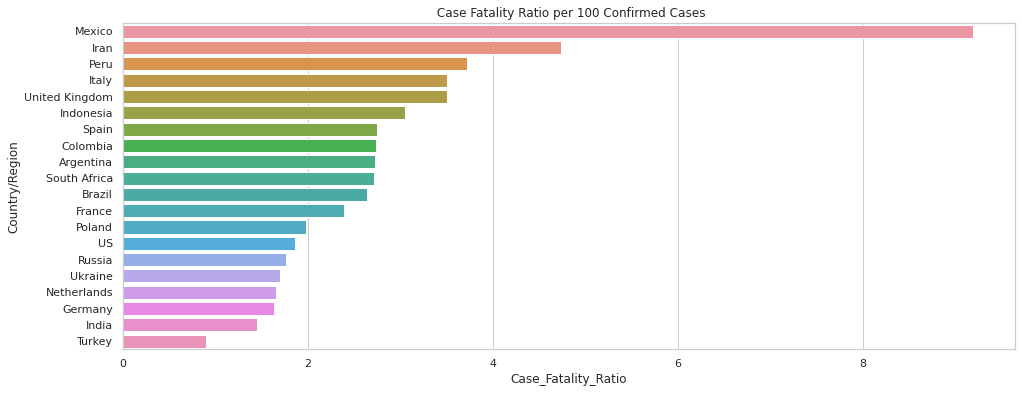

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Case_Fatality_Ratio", y="Country/Region", data = df_6)

ax.set_title(" Case Fatality Ratio per 100 Confirmed Cases")


## **7. Compute the ratio between the total number of confirmed cases and the population size for each country. The file worldpopulation.json contains data on the population size of each country. What are the 10 countries with the highest number of confirmed COVID-19 cases per capita?**

In [ ]:
world_data = pd.read_json('/content/worldpopulation.json')

In [ ]:
# Since US is withing top 20 confirmed cases country we are fixing its name in World Population so that when we merge it doesn't yield None

world_data = world_data.replace("U.S.","US")
world_data = world_data.replace("Czech Republic","Czechia")

df_7 =  world_data[["country","population"]]
df_7_merged = pd.merge(left=new_df, right = df_7, how='left', left_on='Country/Region', right_on = "country")
df_7_merged["Confirmed_cases_per_capita"] = df_7_merged["Confirmed"]/df_7_merged["population"]
df_7_merged

,Date,Country/Region,Confirmed,Deaths,Recovered,country,population,Confirmed_cases_per_capita
0,2020-12-11,Afghanistan,48116,1945,38141.0,Afghanistan,34169169.0,0.001408
1,2020-12-11,Albania,46863,977,24136.0,Albania,2911428.0,0.016096
2,2020-12-11,Algeria,91121,2575,59590.0,Algeria,41063753.0,0.002219
3,2020-12-11,Andorra,7236,78,6598.0,Andorra,68728.0,0.105285
4,2020-12-11,Angola,16061,365,8798.0,Angola,26655513.0,0.000603
...,...,...,...,...,...,...,...,...
186,2020-12-11,Vietnam,1391,35,1238.0,NaN,NaN,NaN
187,2020-12-11,West Bank and Gaza,106622,931,81166.0,NaN,NaN,NaN
188,2020-12-11,Yemen,2082,606,1383.0,Yemen,28119546.0,0.000074
189,2020-12-11,Zambia,18161,365,17329.0,Zambia,17237931.0,0.001054


**10 countries with the highest number of confirmed COVID-19 cases per capita**

In [ ]:
countries = pd.DataFrame(df_7_merged.sort_values("Confirmed_cases_per_capita", ascending=False)[:10])
countries[["Country/Region", "Confirmed_cases_per_capita"]]

,Country/Region,Confirmed_cases_per_capita
3,Andorra,0.105285
103,Luxembourg,0.069774
118,Montenegro,0.064744
12,Bahrain,0.062598
139,Qatar,0.060169
147,San Marino,0.059432
46,Czechia,0.053927
16,Belgium,0.052465
177,US,0.048527
7,Armenia,0.048263


## **8. In this part we would like to test the hypothesis that the spread of the virus is slowed down by warm weather. Plot a graph of the monthly number of confirmed cases vs. the average monthly temperature for a few selected countries, and analyze the correlation between these two factors. You may use the file climate.json which contains monthly climate date from over 100 stations around the world, or you can use your own data sources.**

Let's observed the Trend for top 10 Countries with most Confirmed Cases

In [ ]:
df_2_1 # DataFrame which holds the countries with Most COnfirmed Cases Top 20
# pd.merge(left= df_2_1, right = climate_data , how='left', left_on='Country/Region', right_on = "country")

,Date,Country/Region,Confirmed,Deaths,Recovered,Case_Fatality_Ratio
62061,2020-12-11,US,15842789,295450,6135314.0,1.864886
61963,2020-12-11,India,9826775,142628,9324328.0,1.451422
61907,2020-12-11,Brazil,6836227,180437,6078287.0,2.639424
62025,2020-12-11,Russia,2574319,45370,2041006.0,1.762408
61946,2020-12-11,France,2405210,57671,181581.0,2.397753
62065,2020-12-11,United Kingdom,1814395,63603,3799.0,3.505466
61969,2020-12-11,Italy,1805873,63387,1052163.0,3.510047
62060,2020-12-11,Turkey,1780673,15977,458109.0,0.897245
62045,2020-12-11,Spain,1730575,47624,150376.0,2.751918
61890,2020-12-11,Argentina,1489328,40606,1324792.0,2.726465


In [ ]:
climate_data = pd.read_json('/content/climate.json')
climate_data

,id,city,country,monthlyAvg
0,1,Amsterdam,Netherlands,"[{'high': 7, 'low': 3, 'dryDays': 19, 'snowDay..."
1,2,Athens,Greece,"[{'high': 12, 'low': 7, 'dryDays': 21, 'snowDa..."
2,3,Atlanta GA,United States,"[{'high': 12, 'low': 2, 'dryDays': 18, 'snowDa..."
3,4,Auckland,New Zealand,"[{'high': 23, 'low': 16, 'dryDays': 24, 'snowD..."
4,5,Austin TX,United States,"[{'high': 18, 'low': 6, 'dryDays': 15, 'snowDa..."
...,...,...,...,...
100,101,Albuquerque NM,United States,"[{'high': 10, 'low': -4, 'dryDays': 24, 'snowD..."
101,102,Vermont IL,United States,"[{'high': 3, 'low': -8, 'dryDays': 18, 'snowDa..."
102,103,Nashville TE,United States,"[{'high': 9, 'low': -1, 'dryDays': 18, 'snowDa..."
103,104,St. Louis MO,United States,"[{'high': 7, 'low': -4, 'dryDays': 16, 'snowDa..."


In [ ]:
li = climate_data['monthlyAvg'].values.tolist()

In [ ]:
import simplejson as json
from pandas.io.json import json_normalize
with open('/content/climate.json','r') as f:
    data = json.loads(f.read())

temp_data =json_normalize(data, record_path =['monthlyAvg'], meta =['id','city','country'])
temp_data.replace("United States","US")
temp_data[['high','country','city']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,high,country,city
0,7,Netherlands,Amsterdam
1,6,Netherlands,Amsterdam
2,10,Netherlands,Amsterdam
3,11,Netherlands,Amsterdam
4,16,Netherlands,Amsterdam
...,...,...,...
1255,28,United States,Minneapolis MN
1256,24,United States,Minneapolis MN
1257,16,United States,Minneapolis MN
1258,6,United States,Minneapolis MN


## Finding the Confirmed Cases for US by Month

In [ ]:
df_US = df_1[df_1["Country/Region"]=="US"][["Date","Country/Region","Confirmed"]]

x = df_US.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_US["New_Confirmed_per_day"] = new_li

df_US.Date = pd.to_datetime(df_US.Date)
US_Data = df_US.groupby(pd.Grouper(key='Date', freq='1M')).agg({"New_Confirmed_per_day":'sum'}) # groupby each 1 month
US_Data["Country"] = "US"

us_data = US_Data.reset_index()
us_data["Month"] = pd.to_datetime(us_data['Date']).dt.to_period('M')
us_data

,Date,New_Confirmed_per_day,Country,Month
0,2020-01-31,8,US,2020-01
1,2020-02-29,17,US,2020-02
2,2020-03-31,192152,US,2020-03
3,2020-04-30,884047,US,2020-04
4,2020-05-31,718241,US,2020-05
5,2020-06-30,834359,US,2020-06
6,2020-07-31,1922730,US,2020-07
7,2020-08-31,1464676,US,2020-08
8,2020-09-30,1201822,US,2020-09
9,2020-10-31,1915046,US,2020-10


In [ ]:
## Filtering temperature data for 12 Months For New York City In United States

temp_data_1 = temp_data[temp_data['city'] == "New York City NY"]
# new_temp_data = temp_data.reset_index()
new_data = temp_data_1.replace("United States","US")
final_temp_data = new_data.reset_index()
final_temp_data["Month"] = us_data.Month
final_temp_data["Confirmed_Cases"] = us_data["New_Confirmed_per_day"]
final_temp_data

,index,high,low,dryDays,snowDays,rainfall,id,city,country,Month,Confirmed_Cases
0,672,6,-3,16,8.0,85.4,57,New York City NY,US,2020-01,8
1,673,7,-3,15,6.0,57.0,57,New York City NY,US,2020-02,17
2,674,10,0,16,5.0,98.6,57,New York City NY,US,2020-03,192152
3,675,16,6,13,1.0,95.9,57,New York City NY,US,2020-04,884047
4,676,21,11,14,0.0,102.7,57,New York City NY,US,2020-05,718241
5,677,27,17,15,0.0,98.1,57,New York City NY,US,2020-06,834359
6,678,29,20,17,0.0,101.4,57,New York City NY,US,2020-07,1922730
7,679,29,19,18,0.0,113.6,57,New York City NY,US,2020-08,1464676
8,680,25,16,18,0.0,108.2,57,New York City NY,US,2020-09,1201822
9,681,19,10,19,0.0,96.9,57,New York City NY,US,2020-10,1915046


## Finding the Confirmed Cases for India by Month

In [ ]:
df_ind = df_1[df_1["Country/Region"]=="US"][["Date","Country/Region","Confirmed"]]
x = df_ind.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_ind["New_Confirmed_per_day"] = new_li

df_ind.Date = pd.to_datetime(df_ind.Date)
Ind_Data = df_ind.groupby(pd.Grouper(key='Date', freq='1M')).agg({"New_Confirmed_per_day":'sum'}) # groupby each 1 month
Ind_Data["Country"] = "India"

Ind_data = Ind_Data.reset_index()
Ind_data["Month"] = pd.to_datetime(Ind_data['Date']).dt.to_period('M')
Ind_data

,Date,New_Confirmed_per_day,Country,Month
0,2020-01-31,8,India,2020-01
1,2020-02-29,17,India,2020-02
2,2020-03-31,192152,India,2020-03
3,2020-04-30,884047,India,2020-04
4,2020-05-31,718241,India,2020-05
5,2020-06-30,834359,India,2020-06
6,2020-07-31,1922730,India,2020-07
7,2020-08-31,1464676,India,2020-08
8,2020-09-30,1201822,India,2020-09
9,2020-10-31,1915046,India,2020-10


In [ ]:
temp_data_ind = temp_data[temp_data['city'] == "Mumbai"]
final_temp_Ind = temp_data_ind.reset_index()
final_temp_Ind["Month"] = Ind_data.Month
final_temp_Ind["Confirmed_Cases"] = Ind_data["New_Confirmed_per_day"]
final_temp_Ind


,index,high,low,dryDays,snowDays,rainfall,id,city,country,Month,Confirmed_Cases
0,636,31,17,29,0.0,1.3,54,Mumbai,India,2020-01,8
1,637,32,18,28,0.0,0.4,54,Mumbai,India,2020-02,17
2,638,33,21,31,0.0,6.2,54,Mumbai,India,2020-03,192152
3,639,33,24,30,0.0,7.0,54,Mumbai,India,2020-04,884047
4,640,34,27,27,0.0,26.6,54,Mumbai,India,2020-05,718241
5,641,32,26,8,0.0,494.6,54,Mumbai,India,2020-06,834359
6,642,31,26,2,0.0,735.8,54,Mumbai,India,2020-07,1922730
7,643,30,25,2,0.0,530.7,54,Mumbai,India,2020-08,1464676
8,644,31,25,8,0.0,348.0,54,Mumbai,India,2020-09,1201822
9,645,34,24,24,0.0,90.5,54,Mumbai,India,2020-10,1915046


## Finding the Confirmed Cases for Russia by Month

In [ ]:
df_rus = df_1[df_1["Country/Region"]=="Russia"][["Date","Country/Region","Confirmed"]]
x = df_rus.reset_index()
new_li = [1]

li = x["Confirmed"]
for i in range(1,x.shape[0]):
    temp = abs(li[i] - li[i-1])
    new_li.append(temp)
df_rus["New_Confirmed_per_day"] = new_li

df_rus.Date = pd.to_datetime(df_rus.Date)
Rus_Data = df_rus.groupby(pd.Grouper(key='Date', freq='1M')).agg({"New_Confirmed_per_day":'sum'}) # groupby each 1 month
Rus_Data["Country"] = "Russia"

Rus_data = Rus_Data.reset_index()
Rus_data["Month"] = pd.to_datetime(Rus_data['Date']).dt.to_period('M')
Rus_data

,Date,New_Confirmed_per_day,Country,Month
0,2020-01-31,3,Russia,2020-01
1,2020-02-29,0,Russia,2020-02
2,2020-03-31,2335,Russia,2020-03
3,2020-04-30,104161,Russia,2020-04
4,2020-05-31,299345,Russia,2020-05
5,2020-06-30,241086,Russia,2020-06
6,2020-07-31,191532,Russia,2020-07
7,2020-08-31,153941,Russia,2020-08
8,2020-09-30,178397,Russia,2020-09
9,2020-10-31,435468,Russia,2020-10


In [ ]:
temp_data_rus = temp_data[temp_data['city'] == "Moscow"]
final_temp_rus = temp_data_rus.reset_index()
final_temp_rus["Month"] = Rus_data.Month
final_temp_rus["Confirmed_Cases"] = Rus_data["New_Confirmed_per_day"]
final_temp_rus

,index,high,low,dryDays,snowDays,rainfall,id,city,country,Month,Confirmed_Cases
0,624,-4,-9,10,23.0,44.7,53,Moscow,Russia,2020-01,3
1,625,-4,-11,12,20.0,45.1,53,Moscow,Russia,2020-02,0
2,626,3,-6,16,14.0,32.5,53,Moscow,Russia,2020-03,2335
3,627,11,1,18,4.0,31.4,53,Moscow,Russia,2020-04,104161
4,628,17,6,15,1.0,57.9,53,Moscow,Russia,2020-05,299345
5,629,22,11,15,0.0,73.4,53,Moscow,Russia,2020-06,241086
6,630,24,13,17,0.0,78.8,53,Moscow,Russia,2020-07,191532
7,631,22,11,16,0.0,75.0,53,Moscow,Russia,2020-08,153941
8,632,15,6,15,0.0,62.3,53,Moscow,Russia,2020-09,178397
9,633,8,2,14,4.0,77.2,53,Moscow,Russia,2020-10,435468


**Explantation Problem 8 --** Graph which represets Total Monthly Confirmed zCases vs Average Monthly Temperature month wise. The line here represents the "Confirmed Cases" , the Y-axis Represents the Average Temperature and X-axis represents the Month. Here, we observe that as the avg temperature increases we see a downward slope in the line whereas as the temp decreases the slop of line is positive. WHich clearly indicates that there is a negative Coorelation between the Total Number of Confirmed Cases and Monthly Average Temperature 

Text(0.5, 1.0, 'Monthly confirmed cases vs. the average monthly temperature [Russia]')

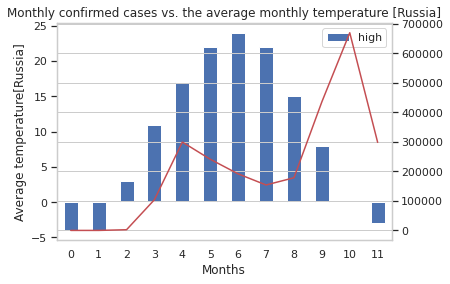

In [ ]:
g_3 = final_temp_rus[["high","Confirmed_Cases","Month"]]
g_3[['Month','high']].plot(kind='bar',xlabel = "Months" ,ylabel = "Average temperature[Russia]")

g_3['Confirmed_Cases'].plot(secondary_y=True, color = "r")
plt.title("Monthly confirmed cases vs. the average monthly temperature [Russia]")

Text(0.5, 1.0, 'Monthly confirmed cases vs. the average monthly temperature [India]')

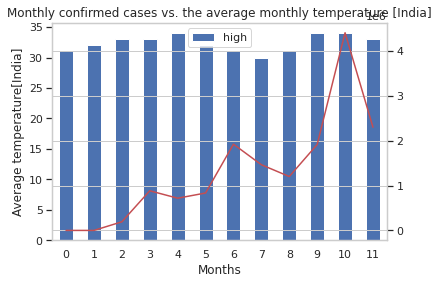

In [ ]:
g_2 = final_temp_Ind[["high","Confirmed_Cases","Month"]]
g_2[['Month','high']].plot(kind='bar',xlabel = "Months" ,ylabel = "Average temperature[India]")

g_2['Confirmed_Cases'].plot(secondary_y=True, color = "r")
plt.title("Monthly confirmed cases vs. the average monthly temperature [India]")

Text(0.5, 1.0, 'Monthly confirmed cases vs. the average monthly temperature [US]')

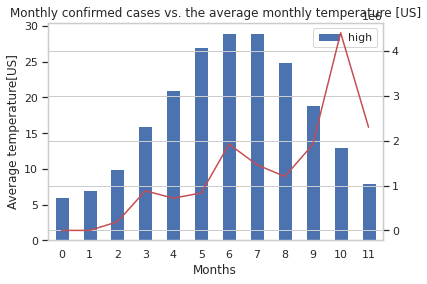

In [ ]:

g = final_temp_data[["high","Confirmed_Cases","Month"]]
g[['Month','high']].plot(kind='bar',xlabel = "Months" ,ylabel = "Average temperature[US]")

g['Confirmed_Cases'].plot(secondary_y=True, color = "r")
plt.title("Monthly confirmed cases vs. the average monthly temperature [US]")

## Thus looking at all these graphs we can say that the Hypothesis stands True i.e the spread of coronavirus slows down as the temperature increases.

## **9. Articulate your own research question related to COVID-19 and try to provide an answer to it using the given data set.**

What are the 10 countries with the highest number of Deaths COVID-19 cases per capita?

In [ ]:
world_data = world_data.replace("U.S.","US")
world_data = world_data.replace("Czech Republic","Czechia")

df_9 =  world_data[["country","population"]]
df_9_merged = pd.merge(left=new_df, right = df_9, how='left', left_on='Country/Region', right_on = "country")
df_9_merged["Death_cases_per_capita"] = df_9_merged["Deaths"]/df_9_merged["population"]
df_9_merged

,Date,Country/Region,Confirmed,Deaths,Recovered,country,population,Death_cases_per_capita
0,2020-12-11,Afghanistan,48116,1945,38141.0,Afghanistan,34169169.0,0.000057
1,2020-12-11,Albania,46863,977,24136.0,Albania,2911428.0,0.000336
2,2020-12-11,Algeria,91121,2575,59590.0,Algeria,41063753.0,0.000063
3,2020-12-11,Andorra,7236,78,6598.0,Andorra,68728.0,0.001135
4,2020-12-11,Angola,16061,365,8798.0,Angola,26655513.0,0.000014
...,...,...,...,...,...,...,...,...
186,2020-12-11,Vietnam,1391,35,1238.0,NaN,NaN,NaN
187,2020-12-11,West Bank and Gaza,106622,931,81166.0,NaN,NaN,NaN
188,2020-12-11,Yemen,2082,606,1383.0,Yemen,28119546.0,0.000022
189,2020-12-11,Zambia,18161,365,17329.0,Zambia,17237931.0,0.000021


In [ ]:
countries = pd.DataFrame(df_9_merged.sort_values("Death_cases_per_capita", ascending=False)[:20])
final_df_9 = countries[["Country/Region", "Death_cases_per_capita"]].reset_index()
final_df_9[["Country/Region","Death_cases_per_capita"]]

,Country/Region,Death_cases_per_capita
0,San Marino,0.001557
1,Belgium,0.001546
2,Andorra,0.001135
3,Peru,0.001135
4,Italy,0.001060
5,Spain,0.001034
6,Slovenia,0.000965
7,Argentina,0.000917
8,Montenegro,0.000909
9,US,0.000905


Text(0.5, 1.0, 'Highest NUmber of Covid Cases-19 cases per capita')

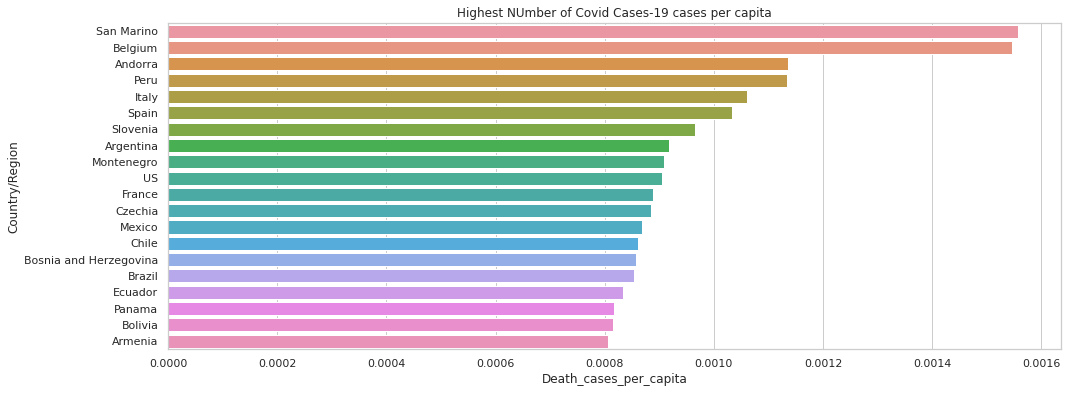

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Death_cases_per_capita", y="Country/Region", data = final_df_9)

ax.set_title("Highest NUmber of Covid Cases-19 cases per capita")